**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files**

In [2]:
fdiry = file.path(FD_RES, "source", "ENCODE_E2G")
for (fname in dir(fdiry)){cat(fname, "\n")}

annotation_e2g_benchmark_ENCSR998YDI 
annotation_e2g_prediction_ENCSR328LMT 
EPCrisprBenchmark_ensemble_data_GRCh38.filtered.tsv 
EPCrisprBenchmark_ensemble_data_GRCh38.filtered.tsv.gz 
EPCrisprBenchmark_ensemble_data_GRCh38.tsv 
EPCrisprBenchmark_ensemble_data_GRCh38.tsv.gz 
Readme.md 
RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed 


## Import data

**Import E2G Benchmark data: EPCrisprBenchmark**

In [3]:
### set file directory
fdiry = file.path(FD_RES, "source", "ENCODE_E2G")
fname = "EPCrisprBenchmark_ensemble_data_GRCh38.filtered.tsv.gz"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath, show_col_types = FALSE)

### Assign and show
dat_peak_encode_e2g_import = dat
print(dim(dat))
head(dat)

[1] 10375    21


chrom,chromStart,chromEnd,name,EffectSize,chrTSS,startTSS,endTSS,measuredGeneSymbol,Significant,⋯,PowerAtEffectSize10,PowerAtEffectSize15,PowerAtEffectSize20,PowerAtEffectSize25,PowerAtEffectSize50,ValidConnection,CellType,Reference,Regulated,Dataset
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<lgl>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.293431866,chr1,3857213,3857214,CEP104,TRUE,⋯,NA,NA,NA,0.8250936,NA,TRUE,K562,Ulirsch2016,TRUE,FlowFISH_K562
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.331178093,chr1,3796503,3796504,LRRC47,TRUE,⋯,NA,NA,NA,0.6089942,NA,TRUE,K562,Ulirsch2016,TRUE,FlowFISH_K562
chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.001471265,chr1,3796503,3796504,LRRC47,FALSE,⋯,0.40,0.80,0.85,1.0000000,1,TRUE,K562,"Gasperini et al., 2019",FALSE,Gasperini2019
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.472019217,chr1,3772761,3772762,SMIM1,TRUE,⋯,NA,NA,NA,0.6393323,NA,TRUE,K562,Ulirsch2016,TRUE,FlowFISH_K562
chr1,3803570,3805848,SMIM1|chr1:3720134-3722412:.,0.025676924,chr1,3772788,3772789,SMIM1,FALSE,⋯,0.80,0.85,1.00,1.0000000,1,TRUE,K562,"Gasperini et al., 2019",FALSE,Gasperini2019
chr1,4126791,4127291,SMIM1|chr1:4186851-4187351:.,0.023383787,chr1,3772788,3772789,SMIM1,FALSE,⋯,0.55,0.80,0.90,0.9500000,1,TRUE,K562,"Gasperini et al., 2019",FALSE,Gasperini2019


In [4]:
print(colnames(dat))

 [1] "chrom"               "chromStart"          "chromEnd"           
 [4] "name"                "EffectSize"          "chrTSS"             
 [7] "startTSS"            "endTSS"              "measuredGeneSymbol" 
[10] "Significant"         "pValueAdjusted"      "PowerAtEffectSize10"
[13] "PowerAtEffectSize15" "PowerAtEffectSize20" "PowerAtEffectSize25"
[16] "PowerAtEffectSize50" "ValidConnection"     "CellType"           
[19] "Reference"           "Regulated"           "Dataset"            


**Store the unzip file**

In [5]:
### set file directory
fdiry = file.path(FD_RES, "source", "ENCODE_E2G")
fname = "EPCrisprBenchmark_ensemble_data_GRCh38.filtered.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_encode_e2g_import
write_tsv(dat, fpath)

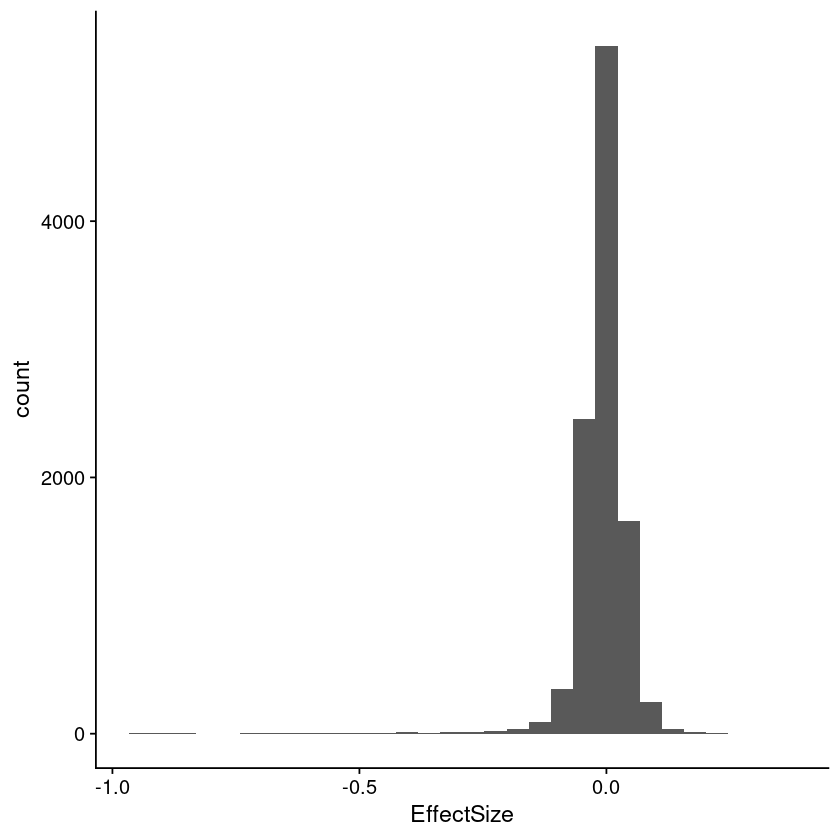

In [6]:
gpt = ggplot(dat, aes(x=EffectSize)) + geom_histogram(bins = 30) + theme_cowplot()
print(gpt)

**Import TSS data**

In [7]:
### set file directory
fdiry = file.path(FD_RES, "results", "region", "annotation_tss_pol2")
fname = "description.tsv"
fpath = file.path(fdiry, fname)

### read header
dat = read_tsv(fpath, show_col_types = FALSE)

### Assign and show
vec_txt_cnames = dat$Name
dat

Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,TSS position
End,TSS position
Name,Gene name
Score,"highest level of pol2 chip seq (ENCFF914WIS.bigWig) at [TSS-500, TSS+500] among TSS isoform"


In [8]:
### set file directory
fdiry = file.path(FD_RES, "results", "region", "annotation_tss_pol2")
fname = "K562.TSS.selected_by_highest_Pol2_signal.filtered_by_RNAseq_TPM.bed.gz"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath, col_names = vec_txt_cnames, show_col_types = FALSE)

### Assign and show
dat_annot_tss_pol2_rnaseq = dat
print(dim(dat))
head(dat)

[1] 11899     5


Chrom,Start,End,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr1,29370,29371,WASH7P,2.30000e-04
chr1,827522,827523,LINC00115,6.44656e+01
chr1,827590,827591,LINC01128,6.44603e+01
chr1,876802,876803,FAM41C,7.88399e-03
chr1,959256,959257,NOC2L,1.04866e+02
chr1,960583,960584,KLHL17,8.22571e+00


## Arrange the table

In [9]:
### init
dat = dat_annot_tss_pol2_rnaseq

### summarize the location of TSS and rename column names
dat = dat %>%
    dplyr::mutate(
        Gene_Symbol     = Name, 
        Gene_TSS_Update = paste0(Chrom,  ":", Start,    "-", End)
    ) %>%
    dplyr::select(Gene_Symbol, Gene_TSS_Update) %>%
    dplyr::distinct()
vec = dat$Gene_Symbol

### assign and show
dat_annot_tss2gene = dat
cat("#Row: ", nrow(dat), "\n")
cat("#Gene:", length(unique(vec)), "\n")
head(dat)

#Row:  11899 
#Gene: 11741 


Gene_Symbol,Gene_TSS_Update
<chr>,<chr>
WASH7P,chr1:29370-29371
LINC00115,chr1:827522-827523
LINC01128,chr1:827590-827591
FAM41C,chr1:876802-876803
NOC2L,chr1:959256-959257
KLHL17,chr1:960583-960584


In [10]:
### init
dat = dat_peak_encode_e2g_import

### rename column names
dat = dat %>% 
    dplyr::rename(
        Chrom = chrom, 
        Start = chromStart, 
        End   = chromEnd, 
        Name  = name)

### set assay type and labels
txt = "ENCODE-E2G_Benchmark"
dat = dat %>% 
    tidyr::separate(Name, c("Gene_Symbol", "Loc"), sep="\\|", remove = FALSE) %>% 
    dplyr::mutate(
        EffectSize  = round(EffectSize, 5),
        Region      = paste0(Chrom,  ":", Start,    "-", End),
        Gene_TSS    = paste0(chrTSS, ":", startTSS, "-", endTSS),
        Assay_Type  = txt,
        Assay_Label = paste0(txt, ":", Gene_Symbol)
    )

### get the columns used for downstream analysis
vec = c('Chrom','Start','End','Name','EffectSize', 
        "Region", "Gene_Symbol", 
        "Gene_TSS",
        'Regulated',
        'Reference', 
        'Assay_Type', 'Assay_Label')
dat = dat %>% 
    dplyr::select({{vec}}) %>% 
    dplyr::distinct()
vec_gene   = dat$Gene_Symbol
vec_region = dat$Region

### assign and show
dat_peak_encode_e2g_arrange = dat
cat("#Row:   ", nrow(dat), "\n")
cat("#Gene:  ", length(unique(vec_gene)), "\n")
cat("#Region:", length(unique(vec_region)), "\n")
head(dat)

#Row:    10375 
#Gene:   2121 
#Region: 3949 


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.00147,chr1:3803570-3805848,LRRC47,chr1:3796503-3796504,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,3803570,3805848,SMIM1|chr1:3720134-3722412:.,0.02568,chr1:3803570-3805848,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,4126791,4127291,SMIM1|chr1:4186851-4187351:.,0.02338,chr1:4126791-4127291,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1


## Define regions

**Define active regions**

In [11]:
dat = dat_peak_encode_e2g_arrange
dat = dat %>% 
    dplyr::filter(Regulated) %>%
    dplyr::arrange(Chrom, Start, End)

vec_gene   = dat$Gene_Symbol
vec_region = dat$Region

### assign and show
dat_peak_encode_e2g_active = dat
cat("#Row:   ", nrow(dat), "\n")
cat("#Gene:  ", length(unique(vec_gene)), "\n")
cat("#Region:", length(unique(vec_region)), "\n")
head(dat)

#Row:    472 
#Gene:   321 
#Region: 420 


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,-0.10741,chr1:8858063-8858563,ENO1,chr1:8879248-8879249,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:ENO1
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,-0.08968,chr1:17441310-17441810,SDHB,chr1:17054169-17054170,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SDHB
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,-0.08462,chr1:25933351-25933954,NUDC,chr1:26900238-26900239,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:NUDC


**Define total regions**

In [12]:
dat = dat_peak_encode_e2g_arrange
dat = dat %>% 
    dplyr::arrange(Chrom, Start, End)

dat_peak_encode_e2g_total = dat
print(dim(dat))
head(dat)

[1] 10375    12


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.00147,chr1:3803570-3805848,LRRC47,chr1:3796503-3796504,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3803570,3805848,SMIM1|chr1:3720134-3722412:.,0.02568,chr1:3803570-3805848,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,4126791,4127291,SMIM1|chr1:4186851-4187351:.,0.02338,chr1:4126791-4127291,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1


**Check results**

In [13]:
vec_txt_region_total    = unique(dat_peak_encode_e2g_total$Region)
vec_txt_region_active   = unique(dat_peak_encode_e2g_active$Region)
vec_txt_region_inactive = setdiff(vec_txt_region_total, vec_txt_region_active)

cat("#Region Total:   ", length(vec_txt_region_total),    "\n")
cat("#Region Active:  ", length(vec_txt_region_active),   "\n")
cat("#Region Inactive:", length(vec_txt_region_inactive), "\n")

#Region Total:    3949 
#Region Active:   420 
#Region Inactive: 3529 


## Data dictionary

In [14]:
dat = dat_peak_encode_e2g_total
for (txt in colnames(dat)){cat(txt, "\n")}

Chrom 
Start 
End 
Name 
EffectSize 
Region 
Gene_Symbol 
Gene_TSS 
Regulated 
Reference 
Assay_Type 
Assay_Label 


In [15]:
dat_cnames = tribble(
    ~Name,         ~Description,
    "Chrom",       "Chromosome of the perturbed element",
    "Start",       "Start of the perturbed element (0-based)",
    "End",         "End of the perturbed element",
    "Name",        "Identifier for the given E-G pair in the form of 'gene|chr:start-stop:strand', e.g. 'BET1L|chr11:220536-220704:*'",
    "Score",       "Change in gene expression upon CRISPRi perturbation, e.g. precentage change in expression or log fold change",
    "Region",      "Location of the perturbed element",
    "Gene_Symbol", "target gene symbol",
    "Gene_TSS",    "target gene TSS",
    "Regulated",   "Whether it is postive case or negative case; True for postive case",
    "Reference",   "Study from which this E-G pair was collected, e.g. Fulco2019",
    "Assay_Type",  "Assay type",
    "Assay_Label", "Assay label"
)
dat_cnames

Name,Description
<chr>,<chr>
Chrom,Chromosome of the perturbed element
Start,Start of the perturbed element (0-based)
End,End of the perturbed element
Name,"Identifier for the given E-G pair in the form of 'gene|chr:start-stop:strand', e.g. 'BET1L|chr11:220536-220704:*'"
Score,"Change in gene expression upon CRISPRi perturbation, e.g. precentage change in expression or log fold change"
Region,Location of the perturbed element
Gene_Symbol,target gene symbol
Gene_TSS,target gene TSS
Regulated,Whether it is postive case or negative case; True for postive case


## Mapping TSS

**Check**

In [16]:
vec1 = dat_peak_encode_e2g_arrange$Gene_Symbol
vec2 = dat_annot_tss_pol2_rnaseq$Name
vec1 = unique(vec1)
vec2 = unique(vec2)
vec3 = intersect(vec1, vec2)
cat(length(vec1), "\n")
cat(length(vec2), "\n")
cat(length(vec3), "\n")
#print(head(vec1))
#print(head(vec2))

2121 
11741 
2027 


In [17]:
dat = dat_peak_encode_e2g_import
dat = dat %>% tidyr::separate(name, c("Gene_Symbol", "Loc"), sep="\\|", remove = FALSE)
print(all(dat$Gene_Symbol == dat$measuredGeneSymbol))

[1] TRUE


In [18]:
dat = dat_peak_encode_e2g_import
print(colnames(dat))

 [1] "chrom"               "chromStart"          "chromEnd"           
 [4] "name"                "EffectSize"          "chrTSS"             
 [7] "startTSS"            "endTSS"              "measuredGeneSymbol" 
[10] "Significant"         "pValueAdjusted"      "PowerAtEffectSize10"
[13] "PowerAtEffectSize15" "PowerAtEffectSize20" "PowerAtEffectSize25"
[16] "PowerAtEffectSize50" "ValidConnection"     "CellType"           
[19] "Reference"           "Regulated"           "Dataset"            


In [19]:
dat = dat_peak_encode_e2g_import
any(is.na(dat$chrTSS))

[1] FALSE

In [20]:
dat = dat_peak_encode_e2g_import
any(is.na(dat$startTSS))

[1] TRUE

In [21]:
dat = dat_annot_tss2gene
head(dat)

Gene_Symbol,Gene_TSS_Update
<chr>,<chr>
WASH7P,chr1:29370-29371
LINC00115,chr1:827522-827523
LINC01128,chr1:827590-827591
FAM41C,chr1:876802-876803
NOC2L,chr1:959256-959257
KLHL17,chr1:960583-960584


**Create list of active/total of original TSS**

In [22]:
### init
dat_tot = dat_peak_encode_e2g_import
dat_tot = dat_tot %>% dplyr::mutate(Gene_Symbol = measuredGeneSymbol)
dat_act = dat_tot %>% dplyr::filter(Regulated)

### collect
lst = list(
    "active" = dat_act,
    "total"  = dat_tot
)

### assign and show
lst_dat_peak_encode_e2g_import = lst
vec = names(lst)
for (idx in vec) {
    dat = lst[[idx]]
    cat(idx, "\n")
    cat("#Row:", dim(dat), "\n")
    cat("\n")
}

active 
#Row: 472 22 

total 
#Row: 10375 22 



**Map TSS for active/total regions**

In [23]:
### init
lst = lst_dat_peak_encode_e2g_import

### map TSS
lst = lapply(lst, function(dat){
    ### mapping TSS to the one we are using in FCC study
    ### Caution: relationship = many-to-many
    dat = dat %>% dplyr::left_join(
        dat_annot_tss2gene, 
        by = "Gene_Symbol",
        relationship = "many-to-many"
    )
    
    ### drop the original TSS and rename the column
    dat = dat %>% 
        dplyr::select(-chrTSS, -startTSS, -endTSS) %>% 
        tidyr::separate(Gene_TSS_Update, c("chrTSS",   "LocTSS"), sep=":", remove = FALSE) %>%
        tidyr::separate(LocTSS,          c("startTSS", "endTSS"), sep="-") %>%
        dplyr::distinct()

    return(dat)
})

### assign and show
lst_dat_peak_encode_e2g_import_updateTSS = lst
vec = names(lst)
for (idx in vec) {
    dat = lst[[idx]]
    cat(idx, "\n")
    cat("#Row:", dim(dat), "\n")
    cat("\n")
}

active 
#Row: 473 23 

total 
#Row: 10399 23 



## Create Interact of element2gene link (original TSS)

**Create bedpe file**

In [25]:
### init
vec_txt_cnames = c('chrom',  'chromStart', 'chromEnd',
        "chrTSS", "startTSS",   "endTSS",
        "name", 
        "EffectSize", 
        "Strand1", "Strand2",
        "Gene_Symbol", "Gene_TSS", "Reference")

### init
lst = lst_dat_peak_encode_e2g_import

### arrange into bedpe format
lst = lapply(lst, function(dat){
    #dat = dat_peak_encode_e2g_import

    ###
    dat = dat %>%
        dplyr::mutate(
            EffectSize   = round(EffectSize, 5),
            Gene_TSS     = paste0(chrTSS, ":", startTSS, "-", endTSS),
            Strand1      = ".",
            Strand2      = "."
        )

    ###
    dat = dat %>% 
        dplyr::select({{vec_txt_cnames}}) %>% 
        dplyr::arrange(chrom, chromStart, chromEnd) %>%
        na.omit
    
    return(dat)
})

lst_dat_peak_encode_e2g_bedpe = lst
vec = names(lst)
for (idx in vec) {
    dat = lst[[idx]]
    cat(idx, "\n")
    cat("#Row:", dim(dat), "\n")
    cat("\n")
}

active 
#Row: 472 13 

total 
#Row: 10294 13 



**Create interact file**

In [27]:
### init
lst = lst_dat_peak_encode_e2g_bedpe

### arrange into interact format
lst = lapply(lst, function(dat){
    ###
    #dat = dat_peak_encode_e2g_bedpe
    dat = dat %>%
        dplyr::mutate(score = 1000, value = 1, exp = ".", color = ".") %>%
        dplyr::mutate(
            chromMid   = as.integer((chromStart + chromEnd) / 2),
            sourceName = paste0(chrom, ":", chromStart, "-", chromEnd),
            targetName = Gene_TSS,
        ) %>%
        dplyr::mutate(
            sourceChrom   = chrom,
            sourceStart   = chromStart,
            sourceEnd     = chromEnd,
            sourceStrand  = ".",
            targetChrom   = chrTSS,
            targetStart   = startTSS,
            targetEnd     = endTSS,
            targetStrand  = "."
        ) %>%
        dplyr::select(
            chrom, chromStart, chromEnd, name, 
            score, value, exp, color,
            sourceChrom,
            sourceStart,
            sourceEnd,
            sourceName,
            sourceStrand,
            targetChrom,
            targetStart,
            targetEnd,
            targetName,
            targetStrand
        )
    return(dat)
})

### assign and show
lst_dat_peak_encode_e2g_interact = lst
vec = names(lst)
for (idx in vec) {
    dat = lst[[idx]]
    cat(idx, "\n")
    cat("#Row:", dim(dat), "\n")
    cat("\n")
}

active 
#Row: 472 18 

total 
#Row: 10294 18 



## Create Interact of element2gene link (using our defined TSS)

In [28]:
### init
vec_txt_cnames = c('chrom',  'chromStart', 'chromEnd',
        "chrTSS", "startTSS",   "endTSS",
        "name", 
        "EffectSize", 
        "Strand1", "Strand2",
        "Gene_Symbol", "Gene_TSS", "Reference")

### init
lst = lst_dat_peak_encode_e2g_import_updateTSS

### arrange into bedpe format
lst = lapply(lst, function(dat){
    #dat = dat_peak_encode_e2g_import

    ###
    dat = dat %>%
        dplyr::mutate(
            EffectSize   = round(EffectSize, 5),
            Gene_TSS     = paste0(chrTSS, ":", startTSS, "-", endTSS),
            Strand1      = ".",
            Strand2      = "."
        )

    ###
    dat = dat %>% 
        dplyr::select({{vec_txt_cnames}}) %>% 
        dplyr::arrange(chrom, chromStart, chromEnd) %>%
        na.omit
    
    return(dat)
})

lst_dat_peak_encode_e2g_bedpe_updateTSS = lst
vec = names(lst)
for (idx in vec) {
    dat = lst[[idx]]
    cat(idx, "\n")
    cat("#Row:", dim(dat), "\n")
    cat("\n")
}

active 
#Row: 450 13 

total 
#Row: 9930 13 



In [29]:
### init
lst = lst_dat_peak_encode_e2g_bedpe_updateTSS

### arrange into interact format
lst = lapply(lst, function(dat){
    ###
    #dat = dat_peak_encode_e2g_bedpe
    dat = dat %>%
        dplyr::mutate(score = 1000, value = 1, exp = ".", color = ".") %>%
        dplyr::mutate(
            chromMid   = as.integer((chromStart + chromEnd) / 2),
            sourceName = paste0(chrom, ":", chromStart, "-", chromEnd),
            targetName = Gene_TSS,
        ) %>%
        dplyr::mutate(
            sourceChrom   = chrom,
            sourceStart   = chromStart,
            sourceEnd     = chromEnd,
            sourceStrand  = ".",
            targetChrom   = chrTSS,
            targetStart   = startTSS,
            targetEnd     = endTSS,
            targetStrand  = "."
        ) %>%
        dplyr::select(
            chrom, chromStart, chromEnd, name, 
            score, value, exp, color,
            sourceChrom,
            sourceStart,
            sourceEnd,
            sourceName,
            sourceStrand,
            targetChrom,
            targetStart,
            targetEnd,
            targetName,
            targetStrand
        )
    return(dat)
})

### assign and show
lst_dat_peak_encode_e2g_interact_updateTSS = lst
vec = names(lst)
for (idx in vec) {
    dat = lst[[idx]]
    cat(idx, "\n")
    cat("#Row:", dim(dat), "\n")
    cat("\n")
}

active 
#Row: 450 18 

total 
#Row: 9930 18 



**Check results: FADS1**

In [30]:
dat = dat_annot_tss_pol2_rnaseq
dat = dat %>% dplyr::filter(str_detect(Name, "FADS1"))
head(dat)

Chrom,Start,End,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,61817003,61817004,FADS1,158.661


In [31]:
lst = lst_dat_peak_encode_e2g_interact
dat = lst[['active']]
txt = "FADS1"

dat = dat %>% 
    dplyr::filter(str_detect(name, txt)) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,61834595,61834918,FADS1|chr11:61602067-61602390:*,chr11,61834595,61834918,chr11:61834595-61834918,chr11,61829317,61829318,chr11:61829317-61829318
chr11,61841784,61841802,FADS1|chr11:61609256-61609274:*,chr11,61841784,61841802,chr11:61841784-61841802,chr11,61829317,61829318,chr11:61829317-61829318
chr11,61871048,61871769,FADS1|chr11:61638520-61639241:.,chr11,61871048,61871769,chr11:61871048-61871769,chr11,61829317,61829318,chr11:61829317-61829318


In [32]:
lst = lst_dat_peak_encode_e2g_interact_updateTSS
dat = lst[['active']]
txt = "FADS1"

dat = dat %>% 
    dplyr::filter(str_detect(name, txt)) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,61834595,61834918,FADS1|chr11:61602067-61602390:*,chr11,61834595,61834918,chr11:61834595-61834918,chr11,61817003,61817004,chr11:61817003-61817004
chr11,61841784,61841802,FADS1|chr11:61609256-61609274:*,chr11,61841784,61841802,chr11:61841784-61841802,chr11,61817003,61817004,chr11:61817003-61817004
chr11,61871048,61871769,FADS1|chr11:61638520-61639241:.,chr11,61871048,61871769,chr11:61871048-61871769,chr11,61817003,61817004,chr11:61817003-61817004


**Check results: HBE1**

In [33]:
dat = dat_annot_tss_pol2_rnaseq
txt = "HBE1"
dat = dat %>% dplyr::filter(str_detect(Name, txt))
head(dat)

Chrom,Start,End,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,5269945,5269946,HBE1,319.925


In [34]:
lst = lst_dat_peak_encode_e2g_interact
dat = lst[['active']]
txt = "HBE1"

dat = dat %>% 
    dplyr::filter(str_detect(name, txt)) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,5272749,5272943,HBE1|chr11:5272749-5272943:.,chr11,5272749,5272943,chr11:5272749-5272943,chr11,5505652,5505653,chr11:5505652-5505653
chr11,5275735,5276235,HBE1|chr11:5296965-5297465:*,chr11,5275735,5276235,chr11:5275735-5276235,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5277927,5278054,HBE1|chr11:5277927-5278054:.,chr11,5277927,5278054,chr11:5277927-5278054,chr11,5505652,5505653,chr11:5505652-5505653
chr11,5278635,5279175,HBE1|chr11:5299865-5300405:*,chr11,5278635,5279175,chr11:5278635-5279175,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5280370,5281170,HBE1|chr11:5301600-5302400:*,chr11,5280370,5281170,chr11:5280370-5281170,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5284535,5285035,HBE1|chr11:5305765-5306265:*,chr11,5284535,5285035,chr11:5284535-5285035,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5288035,5288555,HBE1|chr11:5309265-5309785:*,chr11,5288035,5288555,chr11:5288035-5288555,chr11,5505651,5505652,chr11:5505651-5505652


In [35]:
lst = lst_dat_peak_encode_e2g_interact_updateTSS
dat = lst[['active']]
txt = "HBE1"

dat = dat %>% 
    dplyr::filter(str_detect(name, txt)) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,5272749,5272943,HBE1|chr11:5272749-5272943:.,chr11,5272749,5272943,chr11:5272749-5272943,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5275735,5276235,HBE1|chr11:5296965-5297465:*,chr11,5275735,5276235,chr11:5275735-5276235,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5277927,5278054,HBE1|chr11:5277927-5278054:.,chr11,5277927,5278054,chr11:5277927-5278054,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5278635,5279175,HBE1|chr11:5299865-5300405:*,chr11,5278635,5279175,chr11:5278635-5279175,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5280370,5281170,HBE1|chr11:5301600-5302400:*,chr11,5280370,5281170,chr11:5280370-5281170,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5284535,5285035,HBE1|chr11:5305765-5306265:*,chr11,5284535,5285035,chr11:5284535-5285035,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5288035,5288555,HBE1|chr11:5309265-5309785:*,chr11,5288035,5288555,chr11:5288035-5288555,chr11,5269945,5269946,chr11:5269945-5269946


## Save results

In [36]:
FD_OUT = file.path(FD_RES, "results", "region", "annotation_encode_e2g_benchmark")

In [37]:
fdiry = FD_OUT
fname = "description.tsv"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_cnames
write_tsv(dat, fpath)
dat

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/description.tsv"


Name,Description
<chr>,<chr>
Chrom,Chromosome of the perturbed element
Start,Start of the perturbed element (0-based)
End,End of the perturbed element
Name,"Identifier for the given E-G pair in the form of 'gene|chr:start-stop:strand', e.g. 'BET1L|chr11:220536-220704:*'"
Score,"Change in gene expression upon CRISPRi perturbation, e.g. precentage change in expression or log fold change"
Region,Location of the perturbed element
Gene_Symbol,target gene symbol
Gene_TSS,target gene TSS
Regulated,Whether it is postive case or negative case; True for postive case


In [38]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.total.bed.gz"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_total
#colnames(dat)[1] = "#Chrom"
write_tsv(dat, fpath, col_names = FALSE)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.total.bed.gz"


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.00147,chr1:3803570-3805848,LRRC47,chr1:3796503-3796504,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3803570,3805848,SMIM1|chr1:3720134-3722412:.,0.02568,chr1:3803570-3805848,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,4126791,4127291,SMIM1|chr1:4186851-4187351:.,0.02338,chr1:4126791-4127291,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1


In [39]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.active.bed.gz"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_active
#colnames(dat)[1] = "#Chrom"
write_tsv(dat, fpath, col_names = FALSE)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.bed.gz"


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,-0.10741,chr1:8858063-8858563,ENO1,chr1:8879248-8879249,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:ENO1
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,-0.08968,chr1:17441310-17441810,SDHB,chr1:17054169-17054170,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SDHB
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,-0.08462,chr1:25933351-25933954,NUDC,chr1:26900238-26900239,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:NUDC


In [40]:
lst = lst_dat_peak_encode_e2g_bedpe
for (txt in names(lst)){
    fdiry = FD_OUT
    fname = paste("K562.EPCrisprBenchmark", txt, "region2TSS_Original.bedpe.gz", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    cat("\n")

    dat = lst[[txt]]
    colnames(dat)[1] = "#chrom"
    write_tsv(dat, fpath)
    print(nrow(dat))
    print(head(dat))
    cat("\n")
}

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Original.bedpe.gz"

[1] 472
# A tibble: 6 × 13
  `#chrom` chromStart chromEnd chrTSS startTSS   endTSS name  EffectSize Strand1
  <chr>         <dbl>    <dbl> <chr>     <dbl>    <dbl> <chr>      <dbl> <chr>  
1 chr1        3774714  3775214 chr1    3857213  3857214 CEP1…    -0.293  .      
2 chr1        3774714  3775214 chr1    3796503  3796504 LRRC…    -0.331  .      
3 chr1        3774714  3775214 chr1    3772761  3772762 SMIM…    -0.472  .      
4 chr1        8858063  8858563 chr1    8879248  8879249 ENO1…    -0.107  .      
5 chr1       17441310 17441810 chr1   17054169 17054170 SDHB…    -0.0897 .      
6 chr1       25933351 25933954 chr1   26900238 26900239 NUDC…    -0.0846 .      
# ℹ 4 more variables: Strand2 <chr>, Gene_Symbol <chr>, Gene_TSS <chr>,
#   Reference <chr>

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/regi

In [41]:
lst = lst_dat_peak_encode_e2g_interact
for (txt in names(lst)){
    fdiry = FD_OUT
    fname = paste("K562.EPCrisprBenchmark", txt, "region2TSS_Original.bed", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    cat("\n")

    dat = lst[[txt]]
    colnames(dat)[1] = "#chrom"
    write_tsv(dat, fpath)
    print(nrow(dat))
    print(head(dat))
    cat("\n")
}

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Original.bed"

[1] 472
# A tibble: 6 × 18
  `#chrom` chromStart chromEnd name          score value exp   color sourceChrom
  <chr>         <dbl>    <dbl> <chr>         <dbl> <dbl> <chr> <chr> <chr>      
1 chr1        3774714  3775214 CEP104|chr1:…  1000     1 .     .     chr1       
2 chr1        3774714  3775214 LRRC47|chr1:…  1000     1 .     .     chr1       
3 chr1        3774714  3775214 SMIM1|chr1:3…  1000     1 .     .     chr1       
4 chr1        8858063  8858563 ENO1|chr1:89…  1000     1 .     .     chr1       
5 chr1       17441310 17441810 SDHB|chr1:17…  1000     1 .     .     chr1       
6 chr1       25933351 25933954 NUDC|chr1:26…  1000     1 .     .     chr1       
# ℹ 9 more variables: sourceStart <dbl>, sourceEnd <dbl>, sourceName <chr>,
#   sourceStrand <chr>, targetChrom <chr>, targetStart <dbl>, targetEnd <dbl>,
#   targetN

In [42]:
lst = lst_dat_peak_encode_e2g_bedpe_updateTSS
for (txt in names(lst)){
    fdiry = FD_OUT
    fname = paste("K562.EPCrisprBenchmark", txt, "region2TSS_Updated.bedpe.gz", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    cat("\n")

    dat = lst[[txt]]
    colnames(dat)[1] = "#chrom"
    write_tsv(dat, fpath)
    print(nrow(dat))
    print(head(dat))
    cat("\n")
}

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Updated.bedpe.gz"

[1] 450
# A tibble: 6 × 13
  `#chrom` chromStart chromEnd chrTSS startTSS endTSS   name  EffectSize Strand1
  <chr>         <dbl>    <dbl> <chr>  <chr>    <chr>    <chr>      <dbl> <chr>  
1 chr1        3774714  3775214 chr1   3857211  3857212  CEP1…    -0.293  .      
2 chr1        3774714  3775214 chr1   3796498  3796499  LRRC…    -0.331  .      
3 chr1        3774714  3775214 chr1   3772748  3772749  SMIM…    -0.472  .      
4 chr1        8858063  8858563 chr1   8878686  8878687  ENO1…    -0.107  .      
5 chr1       17441310 17441810 chr1   17054032 17054033 SDHB…    -0.0897 .      
6 chr1       25933351 25933954 chr1   26921742 26921743 NUDC…    -0.0846 .      
# ℹ 4 more variables: Strand2 <chr>, Gene_Symbol <chr>, Gene_TSS <chr>,
#   Reference <chr>

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/regio

In [43]:
lst = lst_dat_peak_encode_e2g_interact_updateTSS
for (txt in names(lst)){
    fdiry = FD_OUT
    fname = paste("K562.EPCrisprBenchmark", txt, "region2TSS_Updated.bed", sep=".")
    fpath = file.path(fdiry, fname)
    print(fpath)
    cat("\n")

    dat = lst[[txt]]
    colnames(dat)[1] = "#chrom"
    write_tsv(dat, fpath)
    print(nrow(dat))
    print(head(dat))
    cat("\n")
}

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Updated.bed"

[1] 450
# A tibble: 6 × 18
  `#chrom` chromStart chromEnd name          score value exp   color sourceChrom
  <chr>         <dbl>    <dbl> <chr>         <dbl> <dbl> <chr> <chr> <chr>      
1 chr1        3774714  3775214 CEP104|chr1:…  1000     1 .     .     chr1       
2 chr1        3774714  3775214 LRRC47|chr1:…  1000     1 .     .     chr1       
3 chr1        3774714  3775214 SMIM1|chr1:3…  1000     1 .     .     chr1       
4 chr1        8858063  8858563 ENO1|chr1:89…  1000     1 .     .     chr1       
5 chr1       17441310 17441810 SDHB|chr1:17…  1000     1 .     .     chr1       
6 chr1       25933351 25933954 NUDC|chr1:26…  1000     1 .     .     chr1       
# ℹ 9 more variables: sourceStart <dbl>, sourceEnd <dbl>, sourceName <chr>,
#   sourceStrand <chr>, targetChrom <chr>, targetStart <chr>, targetEnd <chr>,
#   targetNa

----

## Interact for active regions

In [16]:
txt = c('chrom',  'chromStart', 'chromEnd',
        "chrTSS", "startTSS",   "endTSS",
        "name", 
        "EffectSize", 
        "Strand1", "Strand2",
        "Gene_Symbol", "Gene_TSS", "Reference")

dat = dat_peak_encode_e2g_import
dat = dat %>% 
    dplyr::filter(Regulated) %>%
    tidyr::separate(name, c("Gene_Symbol", "Loc"), sep="\\|", remove = FALSE) %>% 
    dplyr::mutate(
        EffectSize   = round(EffectSize, 5),
        Gene_TSS     = paste0(chrTSS, ":", startTSS, "-", endTSS),
        Strand1      = ".",
        Strand2      = "."
    )

dat = dat %>% 
    dplyr::select({{txt}}) %>% 
    dplyr::arrange(chrom, chromStart, chromEnd)

dat_peak_encode_e2g_bedpe = dat
print(dim(dat))
head(dat)

[1] 472  13


chrom,chromStart,chromEnd,chrTSS,startTSS,endTSS,name,EffectSize,Strand1,Strand2,Gene_Symbol,Gene_TSS,Reference
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,3774714,3775214,chr1,3857213,3857214,CEP104|chr1:3691278-3691778:*,-0.29343,.,.,CEP104,chr1:3857213-3857214,Ulirsch2016
chr1,3774714,3775214,chr1,3796503,3796504,LRRC47|chr1:3691278-3691778:*,-0.33118,.,.,LRRC47,chr1:3796503-3796504,Ulirsch2016
chr1,3774714,3775214,chr1,3772761,3772762,SMIM1|chr1:3691278-3691778:*,-0.47202,.,.,SMIM1,chr1:3772761-3772762,Ulirsch2016
chr1,8858063,8858563,chr1,8879248,8879249,ENO1|chr1:8918122-8918622:.,-0.10741,.,.,ENO1,chr1:8879248-8879249,"Gasperini et al., 2019"
chr1,17441310,17441810,chr1,17054169,17054170,SDHB|chr1:17767806-17768306:.,-0.08968,.,.,SDHB,chr1:17054169-17054170,"Gasperini et al., 2019"
chr1,25933351,25933954,chr1,26900238,26900239,NUDC|chr1:26259842-26260445:.,-0.08462,.,.,NUDC,chr1:26900238-26900239,"Gasperini et al., 2019"


In [17]:
dat = dat_peak_encode_e2g_bedpe

dat = dat %>%
    dplyr::mutate(score = 1000, value = 1, exp = ".", color = ".") %>%
    dplyr::mutate(
        chromMid = as.integer((chromStart + chromEnd) / 2),
        sourceName = paste0(chrom, ":", chromStart, "-", chromEnd),
        targetName = Gene_TSS,
    ) %>%
    dplyr::mutate(
        sourceChrom   = chrom,
        sourceStart   = chromStart,
        sourceEnd     = chromEnd,
        sourceStrand  = ".",
        targetChrom   = chrTSS,
        targetStart   = startTSS,
        targetEnd     = endTSS,
        targetStrand  = "."
    ) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        score, value, exp, color,
        sourceChrom,
        sourceStart,
        sourceEnd,
        sourceName,
        sourceStrand,
        targetChrom,
        targetStart,
        targetEnd,
        targetName,
        targetStrand
    )

dat_peak_encode_e2g_interact = dat
print(dim(dat))
head(dat)

[1] 472  18


chrom,chromStart,chromEnd,name,score,value,exp,color,sourceChrom,sourceStart,sourceEnd,sourceName,sourceStrand,targetChrom,targetStart,targetEnd,targetName,targetStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3857213,3857214,chr1:3857213-3857214,.
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3796503,3796504,chr1:3796503-3796504,.
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3772761,3772762,chr1:3772761-3772762,.
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,1000,1,.,.,chr1,8858063,8858563,chr1:8858063-8858563,.,chr1,8879248,8879249,chr1:8879248-8879249,.
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,1000,1,.,.,chr1,17441310,17441810,chr1:17441310-17441810,.,chr1,17054169,17054170,chr1:17054169-17054170,.
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,1000,1,.,.,chr1,25933351,25933954,chr1:25933351-25933954,.,chr1,26900238,26900239,chr1:26900238-26900239,.


## Update element2gene link using our defined TSS

**Check the number of overlaped genes**

In [18]:
vec1 = dat_peak_encode_e2g_arrange$Gene_Symbol
vec2 = dat_annot_tss_pol2_rnaseq$Name
vec1 = unique(vec1)
vec2 = unique(vec2)
vec3 = intersect(vec1, vec2)
cat(length(vec1), "\n")
cat(length(vec2), "\n")
cat(length(vec3), "\n")
#print(head(vec1))
#print(head(vec2))

2121 
11741 
2027 


In [19]:
dat = dat_peak_encode_e2g_bedpe
fun_display_table(head(dat))

chrom,chromStart,chromEnd,chrTSS,startTSS,endTSS,name,EffectSize,Strand1,Strand2,Gene_Symbol,Gene_TSS,Reference
chr1,3774714,3775214,chr1,3857213,3857214,CEP104|chr1:3691278-3691778:*,-0.29343,.,.,CEP104,chr1:3857213-3857214,Ulirsch2016
chr1,3774714,3775214,chr1,3796503,3796504,LRRC47|chr1:3691278-3691778:*,-0.33118,.,.,LRRC47,chr1:3796503-3796504,Ulirsch2016
chr1,3774714,3775214,chr1,3772761,3772762,SMIM1|chr1:3691278-3691778:*,-0.47202,.,.,SMIM1,chr1:3772761-3772762,Ulirsch2016
chr1,8858063,8858563,chr1,8879248,8879249,ENO1|chr1:8918122-8918622:.,-0.10741,.,.,ENO1,chr1:8879248-8879249,"Gasperini et al., 2019"
chr1,17441310,17441810,chr1,17054169,17054170,SDHB|chr1:17767806-17768306:.,-0.08968,.,.,SDHB,chr1:17054169-17054170,"Gasperini et al., 2019"
chr1,25933351,25933954,chr1,26900238,26900239,NUDC|chr1:26259842-26260445:.,-0.08462,.,.,NUDC,chr1:26900238-26900239,"Gasperini et al., 2019"


In [20]:
### init
dat = dat_peak_encode_e2g_bedpe
txt = c('chrom',  'chromStart', 'chromEnd',
        "chrTSS", "startTSS",   "endTSS",
        "name", 
        "EffectSize", 
        "Strand1", "Strand2",
        "Gene_Symbol", "Gene_TSS", "Reference")

### mapping TSS to the one we are using in FCC study
### Caution: relationship = many-to-many
dat = dat %>% dplyr::left_join(
    dat_annot_tss2gene, 
    by = "Gene_Symbol",
    relationship = "many-to-many"
)

### drop the original TSS and rename the column
dat = dat %>% 
    dplyr::select(-Gene_TSS, -chrTSS, -startTSS, -endTSS) %>% 
    dplyr::rename(Gene_TSS = Gene_TSS_Update) %>% 
    tidyr::separate(Gene_TSS, c("chrTSS", "startTSS", "endTSS"), remove = FALSE) %>%
    dplyr::distinct() %>%
    na.omit

### arrange the table
dat = dat %>% 
    dplyr::select({{txt}}) %>% 
    dplyr::arrange(chrom, chromStart, chromEnd)

### assign and show
dat_peak_encode_e2g_bedpe_updateTSS = dat

print(dim(dat_peak_encode_e2g_bedpe))
print(dim(dat_peak_encode_e2g_bedpe_updateTSS))

vec_gene   = dat$Gene_Symbol
vec_region = paste(dat$chrom, dat$chromStart, dat$chromEnd, sep="_")
cat("#Row:   ", nrow(dat), "\n")
cat("#Gene:  ", length(unique(vec_gene)), "\n")
cat("#Region:", length(unique(vec_region)), "\n")
head(dat)

[1] 472  13
[1] 450  13
#Row:    450 
#Gene:   306 
#Region: 402 


chrom,chromStart,chromEnd,chrTSS,startTSS,endTSS,name,EffectSize,Strand1,Strand2,Gene_Symbol,Gene_TSS,Reference
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,3774714,3775214,chr1,3857211,3857212,CEP104|chr1:3691278-3691778:*,-0.29343,.,.,CEP104,chr1:3857211-3857212,Ulirsch2016
chr1,3774714,3775214,chr1,3796498,3796499,LRRC47|chr1:3691278-3691778:*,-0.33118,.,.,LRRC47,chr1:3796498-3796499,Ulirsch2016
chr1,3774714,3775214,chr1,3772748,3772749,SMIM1|chr1:3691278-3691778:*,-0.47202,.,.,SMIM1,chr1:3772748-3772749,Ulirsch2016
chr1,8858063,8858563,chr1,8878686,8878687,ENO1|chr1:8918122-8918622:.,-0.10741,.,.,ENO1,chr1:8878686-8878687,"Gasperini et al., 2019"
chr1,17441310,17441810,chr1,17054032,17054033,SDHB|chr1:17767806-17768306:.,-0.08968,.,.,SDHB,chr1:17054032-17054033,"Gasperini et al., 2019"
chr1,25933351,25933954,chr1,26921742,26921743,NUDC|chr1:26259842-26260445:.,-0.08462,.,.,NUDC,chr1:26921742-26921743,"Gasperini et al., 2019"


In [21]:
dat = dat_peak_encode_e2g_bedpe_updateTSS

dat = dat %>%
    dplyr::mutate(score = 1000, value = 1, exp = ".", color = ".") %>%
    dplyr::mutate(
        chromMid = as.integer((chromStart + chromEnd) / 2),
        sourceName = paste0(chrom, ":", chromStart, "-", chromEnd),
        targetName = Gene_TSS,
    ) %>%
    dplyr::mutate(
        sourceChrom   = chrom,
        sourceStart   = chromStart,
        sourceEnd     = chromEnd,
        sourceStrand  = ".",
        targetChrom   = chrTSS,
        targetStart   = startTSS,
        targetEnd     = endTSS,
        targetStrand  = "."
    ) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        score, value, exp, color,
        sourceChrom,
        sourceStart,
        sourceEnd,
        sourceName,
        sourceStrand,
        targetChrom,
        targetStart,
        targetEnd,
        targetName,
        targetStrand
    )

dat_peak_encode_e2g_interact_updateTSS = dat
print(dim(dat))
head(dat)

[1] 450  18


chrom,chromStart,chromEnd,name,score,value,exp,color,sourceChrom,sourceStart,sourceEnd,sourceName,sourceStrand,targetChrom,targetStart,targetEnd,targetName,targetStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3857211,3857212,chr1:3857211-3857212,.
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3796498,3796499,chr1:3796498-3796499,.
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3772748,3772749,chr1:3772748-3772749,.
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,1000,1,.,.,chr1,8858063,8858563,chr1:8858063-8858563,.,chr1,8878686,8878687,chr1:8878686-8878687,.
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,1000,1,.,.,chr1,17441310,17441810,chr1:17441310-17441810,.,chr1,17054032,17054033,chr1:17054032-17054033,.
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,1000,1,.,.,chr1,25933351,25933954,chr1:25933351-25933954,.,chr1,26921742,26921743,chr1:26921742-26921743,.


**Check results: FADS1**

In [22]:
dat = dat_annot_tss_pol2_rnaseq
dat = dat %>% dplyr::filter(str_detect(Name, "FADS1"))
head(dat)

Chrom,Start,End,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,61817003,61817004,FADS1,158.661


In [23]:
dat = dat_peak_encode_e2g_interact
dat = dat %>% 
    dplyr::filter(str_detect(name, "FADS1")) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,61834595,61834918,FADS1|chr11:61602067-61602390:*,chr11,61834595,61834918,chr11:61834595-61834918,chr11,61829317,61829318,chr11:61829317-61829318
chr11,61841784,61841802,FADS1|chr11:61609256-61609274:*,chr11,61841784,61841802,chr11:61841784-61841802,chr11,61829317,61829318,chr11:61829317-61829318
chr11,61871048,61871769,FADS1|chr11:61638520-61639241:.,chr11,61871048,61871769,chr11:61871048-61871769,chr11,61829317,61829318,chr11:61829317-61829318


In [24]:
dat = dat_peak_encode_e2g_interact_updateTSS
dat = dat %>% 
    dplyr::filter(str_detect(name, "FADS1")) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,61834595,61834918,FADS1|chr11:61602067-61602390:*,chr11,61834595,61834918,chr11:61834595-61834918,chr11,61817003,61817004,chr11:61817003-61817004
chr11,61841784,61841802,FADS1|chr11:61609256-61609274:*,chr11,61841784,61841802,chr11:61841784-61841802,chr11,61817003,61817004,chr11:61817003-61817004
chr11,61871048,61871769,FADS1|chr11:61638520-61639241:.,chr11,61871048,61871769,chr11:61871048-61871769,chr11,61817003,61817004,chr11:61817003-61817004


**Check results: HBE1**

In [25]:
dat = dat_annot_tss_pol2_rnaseq
txt = "HBE1"
dat = dat %>% dplyr::filter(str_detect(Name, txt))
head(dat)

Chrom,Start,End,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr11,5269945,5269946,HBE1,319.925


In [26]:
dat = dat_peak_encode_e2g_interact
txt = "HBE1"
dat = dat %>% 
    dplyr::filter(str_detect(name, txt)) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,5272749,5272943,HBE1|chr11:5272749-5272943:.,chr11,5272749,5272943,chr11:5272749-5272943,chr11,5505652,5505653,chr11:5505652-5505653
chr11,5275735,5276235,HBE1|chr11:5296965-5297465:*,chr11,5275735,5276235,chr11:5275735-5276235,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5277927,5278054,HBE1|chr11:5277927-5278054:.,chr11,5277927,5278054,chr11:5277927-5278054,chr11,5505652,5505653,chr11:5505652-5505653
chr11,5278635,5279175,HBE1|chr11:5299865-5300405:*,chr11,5278635,5279175,chr11:5278635-5279175,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5280370,5281170,HBE1|chr11:5301600-5302400:*,chr11,5280370,5281170,chr11:5280370-5281170,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5284535,5285035,HBE1|chr11:5305765-5306265:*,chr11,5284535,5285035,chr11:5284535-5285035,chr11,5505651,5505652,chr11:5505651-5505652
chr11,5288035,5288555,HBE1|chr11:5309265-5309785:*,chr11,5288035,5288555,chr11:5288035-5288555,chr11,5505651,5505652,chr11:5505651-5505652


In [27]:
dat = dat_peak_encode_e2g_interact_updateTSS
txt = "HBE1"
dat = dat %>% 
    dplyr::filter(str_detect(name, txt)) %>%
    dplyr::select(
        chrom, chromStart, chromEnd, name, 
        sourceChrom, sourceStart, sourceEnd, sourceName,
        targetChrom, targetStart, targetEnd, targetName)
fun_display_table(dat)

chrom,chromStart,chromEnd,name,sourceChrom,sourceStart,sourceEnd,sourceName,targetChrom,targetStart,targetEnd,targetName
chr11,5272749,5272943,HBE1|chr11:5272749-5272943:.,chr11,5272749,5272943,chr11:5272749-5272943,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5275735,5276235,HBE1|chr11:5296965-5297465:*,chr11,5275735,5276235,chr11:5275735-5276235,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5277927,5278054,HBE1|chr11:5277927-5278054:.,chr11,5277927,5278054,chr11:5277927-5278054,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5278635,5279175,HBE1|chr11:5299865-5300405:*,chr11,5278635,5279175,chr11:5278635-5279175,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5280370,5281170,HBE1|chr11:5301600-5302400:*,chr11,5280370,5281170,chr11:5280370-5281170,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5284535,5285035,HBE1|chr11:5305765-5306265:*,chr11,5284535,5285035,chr11:5284535-5285035,chr11,5269945,5269946,chr11:5269945-5269946
chr11,5288035,5288555,HBE1|chr11:5309265-5309785:*,chr11,5288035,5288555,chr11:5288035-5288555,chr11,5269945,5269946,chr11:5269945-5269946


## Save results

In [28]:
FD_OUT = file.path(FD_RES, "results", "region", "annotation_encode_e2g_benchmark")

In [29]:
fdiry = FD_OUT
fname = "description.tsv"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_cnames
write_tsv(dat, fpath)
dat

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/description.tsv"


Name,Description
<chr>,<chr>
Chrom,Chromosome of the perturbed element
Start,Start of the perturbed element (0-based)
End,End of the perturbed element
Name,"Identifier for the given E-G pair in the form of 'gene|chr:start-stop:strand', e.g. 'BET1L|chr11:220536-220704:*'"
Score,"Change in gene expression upon CRISPRi perturbation, e.g. precentage change in expression or log fold change"
Region,Location of the perturbed element
Gene_Symbol,target gene symbol
Gene_TSS,target gene TSS
Regulated,Whether it is postive case or negative case; True for postive case


In [30]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.total.bed.gz"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_total
#colnames(dat)[1] = "#Chrom"
write_tsv(dat, fpath, col_names = FALSE)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.total.bed.gz"


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.00147,chr1:3803570-3805848,LRRC47,chr1:3796503-3796504,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3803570,3805848,SMIM1|chr1:3720134-3722412:.,0.02568,chr1:3803570-3805848,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,4126791,4127291,SMIM1|chr1:4186851-4187351:.,0.02338,chr1:4126791-4127291,SMIM1,chr1:3772788-3772789,FALSE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1


In [31]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.active.bed.gz"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_active
#colnames(dat)[1] = "#Chrom"
write_tsv(dat, fpath, col_names = FALSE)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.bed.gz"


Chrom,Start,End,Name,EffectSize,Region,Gene_Symbol,Gene_TSS,Regulated,Reference,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.29343,chr1:3774714-3775214,CEP104,chr1:3857213-3857214,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:CEP104
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.33118,chr1:3774714-3775214,LRRC47,chr1:3796503-3796504,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:LRRC47
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.47202,chr1:3774714-3775214,SMIM1,chr1:3772761-3772762,TRUE,Ulirsch2016,ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SMIM1
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,-0.10741,chr1:8858063-8858563,ENO1,chr1:8879248-8879249,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:ENO1
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,-0.08968,chr1:17441310-17441810,SDHB,chr1:17054169-17054170,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:SDHB
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,-0.08462,chr1:25933351-25933954,NUDC,chr1:26900238-26900239,TRUE,"Gasperini et al., 2019",ENCODE-E2G_Benchmark,ENCODE-E2G_Benchmark:NUDC


In [32]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.active.region2TSS_Original.bedpe.gz"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_bedpe
colnames(dat)[1] = "#chrom"
write_tsv(dat, fpath)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Original.bedpe.gz"


#chrom,chromStart,chromEnd,chrTSS,startTSS,endTSS,name,EffectSize,Strand1,Strand2,Gene_Symbol,Gene_TSS,Reference
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,3774714,3775214,chr1,3857213,3857214,CEP104|chr1:3691278-3691778:*,-0.29343,.,.,CEP104,chr1:3857213-3857214,Ulirsch2016
chr1,3774714,3775214,chr1,3796503,3796504,LRRC47|chr1:3691278-3691778:*,-0.33118,.,.,LRRC47,chr1:3796503-3796504,Ulirsch2016
chr1,3774714,3775214,chr1,3772761,3772762,SMIM1|chr1:3691278-3691778:*,-0.47202,.,.,SMIM1,chr1:3772761-3772762,Ulirsch2016
chr1,8858063,8858563,chr1,8879248,8879249,ENO1|chr1:8918122-8918622:.,-0.10741,.,.,ENO1,chr1:8879248-8879249,"Gasperini et al., 2019"
chr1,17441310,17441810,chr1,17054169,17054170,SDHB|chr1:17767806-17768306:.,-0.08968,.,.,SDHB,chr1:17054169-17054170,"Gasperini et al., 2019"
chr1,25933351,25933954,chr1,26900238,26900239,NUDC|chr1:26259842-26260445:.,-0.08462,.,.,NUDC,chr1:26900238-26900239,"Gasperini et al., 2019"


In [33]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.active.region2TSS_Original.bed"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_interact
colnames(dat)[1] = "#chrom"
write_tsv(dat, fpath)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Original.bed"


#chrom,chromStart,chromEnd,name,score,value,exp,color,sourceChrom,sourceStart,sourceEnd,sourceName,sourceStrand,targetChrom,targetStart,targetEnd,targetName,targetStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3857213,3857214,chr1:3857213-3857214,.
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3796503,3796504,chr1:3796503-3796504,.
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3772761,3772762,chr1:3772761-3772762,.
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,1000,1,.,.,chr1,8858063,8858563,chr1:8858063-8858563,.,chr1,8879248,8879249,chr1:8879248-8879249,.
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,1000,1,.,.,chr1,17441310,17441810,chr1:17441310-17441810,.,chr1,17054169,17054170,chr1:17054169-17054170,.
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,1000,1,.,.,chr1,25933351,25933954,chr1:25933351-25933954,.,chr1,26900238,26900239,chr1:26900238-26900239,.


In [34]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.active.region2TSS_Updated.bedpe.gz"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_bedpe_updateTSS
colnames(dat)[1] = "#chrom"
write_tsv(dat, fpath)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Updated.bedpe.gz"


#chrom,chromStart,chromEnd,chrTSS,startTSS,endTSS,name,EffectSize,Strand1,Strand2,Gene_Symbol,Gene_TSS,Reference
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,3774714,3775214,chr1,3857211,3857212,CEP104|chr1:3691278-3691778:*,-0.29343,.,.,CEP104,chr1:3857211-3857212,Ulirsch2016
chr1,3774714,3775214,chr1,3796498,3796499,LRRC47|chr1:3691278-3691778:*,-0.33118,.,.,LRRC47,chr1:3796498-3796499,Ulirsch2016
chr1,3774714,3775214,chr1,3772748,3772749,SMIM1|chr1:3691278-3691778:*,-0.47202,.,.,SMIM1,chr1:3772748-3772749,Ulirsch2016
chr1,8858063,8858563,chr1,8878686,8878687,ENO1|chr1:8918122-8918622:.,-0.10741,.,.,ENO1,chr1:8878686-8878687,"Gasperini et al., 2019"
chr1,17441310,17441810,chr1,17054032,17054033,SDHB|chr1:17767806-17768306:.,-0.08968,.,.,SDHB,chr1:17054032-17054033,"Gasperini et al., 2019"
chr1,25933351,25933954,chr1,26921742,26921743,NUDC|chr1:26259842-26260445:.,-0.08462,.,.,NUDC,chr1:26921742-26921743,"Gasperini et al., 2019"


In [35]:
fdiry = FD_OUT
fname = "K562.EPCrisprBenchmark.active.region2TSS_Updated.bed"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_peak_encode_e2g_interact_updateTSS
colnames(dat)[1] = "#chrom"
write_tsv(dat, fpath)
head(dat)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_encode_e2g_benchmark/K562.EPCrisprBenchmark.active.region2TSS_Updated.bed"


#chrom,chromStart,chromEnd,name,score,value,exp,color,sourceChrom,sourceStart,sourceEnd,sourceName,sourceStrand,targetChrom,targetStart,targetEnd,targetName,targetStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3857211,3857212,chr1:3857211-3857212,.
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3796498,3796499,chr1:3796498-3796499,.
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,1000,1,.,.,chr1,3774714,3775214,chr1:3774714-3775214,.,chr1,3772748,3772749,chr1:3772748-3772749,.
chr1,8858063,8858563,ENO1|chr1:8918122-8918622:.,1000,1,.,.,chr1,8858063,8858563,chr1:8858063-8858563,.,chr1,8878686,8878687,chr1:8878686-8878687,.
chr1,17441310,17441810,SDHB|chr1:17767806-17768306:.,1000,1,.,.,chr1,17441310,17441810,chr1:17441310-17441810,.,chr1,17054032,17054033,chr1:17054032-17054033,.
chr1,25933351,25933954,NUDC|chr1:26259842-26260445:.,1000,1,.,.,chr1,25933351,25933954,chr1:25933351-25933954,.,chr1,26921742,26921743,chr1:26921742-26921743,.
